<img alt="Platforms" height="45px" src="https://res.cloudinary.com/dltf2/image/upload/v1563482460/workshops/dl_tf2_2019_07_21/logo_chi03g.png" align="left" hspace="10px" vspace="0px">


# Welcome to Session 01

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

In [0]:
#@title ## Mounting Gdrive

USE_G_COLAB = True #@param {type:"boolean"}

if USE_G_COLAB:
    from google.colab import drive

    
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
#@title ## Project Root

root_dir = ''

if USE_G_COLAB:
    root_dir = '/content/drive/My Drive/dl_app/' #@param {type:"string"}

In [0]:
!ls $root_dir

ls: cannot access '/content/drive/My': No such file or directory
ls: cannot access 'Drive/workshops/2019_07_21/sessions_01/': No such file or directory


In [0]:
#@title ## Installing requried packages

#@markdown ---
#@markdown - [TensorFlow 2.0-beta](https://www.tensorflow.org/install/gpu)
#@markdown - [Watermark](https://github.com/rasbt/watermark)
!pip install -q tensorflow-gpu==2.0.0-beta1
!pip install -qU watermark

In [0]:
#@title ## Custom Matplotlib Style
mpl_style = "https://gist.githubusercontent.com/m3hrdadfi/af8aca01094afb7d3e5b46de9ad8d509/raw/871ec5d721a3b438c3c896718ea4aafc91ea9744/gadfly.mplstyle" #@param {type:"string"}

!wget -q $mpl_style -O /root/.config/matplotlib/matplotlibrc

In [0]:
#@title ## General Paramas

#@markdown > A random seed is a number used to initialize a pseudorandom number generator. For a seed to be used in a pseudorandom number generator, it does not need to be random
RANDOM_SEED = 141 #@param {type:"integer"}

# Overview

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/mlp.png" width=450>

$z_2 = XW_1$

$a_2 = f(z_2)$

$z_3 = a_2W_2$

$\hat{y} = softmax(z_3)$ # classification

*where*:
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W_1$ = 1st layer weights | $\in \mathbb{R}^{DXH}$ ($H$ is the number of hidden units in layer 1)
* $z_2$ = outputs from first layer's weights  $\in \mathbb{R}^{NXH}$
* $f$ = non-linear activation function
* $a_2$ = activation applied first layer's outputs | $\in \mathbb{R}^{NXH}$
* $W_2$ = 2nd layer weights | $\in \mathbb{R}^{HXC}$ ($C$ is the number of classes)
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NXC}$ ($N$ is the number of samples)

This is a simple two-layer MLP. 

* **Objective:**  Predict the probability of class $y$ given the inputs $X$. Non-linearity is introduced to model the complex, non-linear data.
* **Advantages:**
  * Can model non-linear patterns in the data really well.
* **Disadvantages:**
  * Overfits easily.
  * Computationally intensive as network increases in size.
  * Not easily interpretable.
* **Miscellaneous:** Future neural network architectures that we'll see use the MLP as a modular unit for feed forward operations (affine transformation (XW) followed by a non-linear operation).

## 7 Common Nonlinear Activation Functions  and How to Choose an Activation Function

#### SIGMOID / LOGISTIC

*ADVANTAGES*
- Smooth gradient, preventing “jumps” in output values.
- Output values bound between 0 and 1, normalizing the output of each neuron.
- Clear predictions—For X above 2 or below -2, tends to bring the Y value (the prediction) to the edge of the curve, very close to 1 or 0. This enables clear predictions.

*DISADVANTAGES*
- Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
- Outputs not zero centered.
- Computationally expensive
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563629033/workshops/dl_tf2_2019_07_21/sigmoidlogisticgraph_kxb3p0.png" width=450>
    </p>

#### TANH / HYPERBOLIC TANGENT

*ADVANTAGES*
- Zero centered—making it easier to model inputs that have strongly negative, neutral, and strongly positive values.
- Otherwise like the Sigmoid function.

*DISADVANTAGES*
- Like the Sigmoid function
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563629444/workshops/dl_tf2_2019_07_21/tanhhyperbolic_hur6j6.png" width=450>
    </p>

#### RELU (RECTIFIED LINEAR UNIT)

*ADVANTAGES*
- Computationally efficient—allows the network to converge very quickly
- Non-linear—although it looks like a linear function, ReLU has a derivative function and allows for backpropagation.

*DISADVANTAGES*
- The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.
- Like the Sigmoid function
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563649988/workshops/dl_tf2_2019_07_21/relu_hqhcw5.png" width=450>
    </p>
    
#### LEAKY RELU

*ADVANTAGES*
- Prevents dying ReLU problem—this variation of ReLU has a small positive slope in the negative area, so it does enable backpropagation, even for negative input values
Otherwise like ReLU

*DISADVANTAGES*
Results not consistent—leaky ReLU does not provide consistent predictions for negative input values.
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563650740/workshops/dl_tf2_2019_07_21/leakyrelu_qvzsgx.png" width=450>
    </p>

#### PARAMETRIC RELU

*ADVANTAGES*
- Allows the negative slope to be learned—unlike leaky ReLU, this function provides the slope of the negative part of the function as an argument. It is, therefore, possible to perform backpropagation and learn the most appropriate value of α.
Otherwise like ReLU

*DISADVANTAGES*
May perform differently for different problems.

<p align="center">
$ f(x) = max( \alpha x,x)$
    </p>
  
#### SOFTMAX

*ADVANTAGES*
- Able to handle multiple classes only one class in other activation functions—normalizes the outputs for each class between 0 and 1, and divides by their sum, giving the probability of the input value being in a specific class.
- Useful for output neurons—typically Softmax is used only for the output layer, for neural networks that need to classify inputs into multiple categories.

<p align="center">
$ \frac{ e^{ z_{j} } }{   \sum_{k=1}^c e^{ z_{k} } } $
    </p>
    
#### SWISH

Swish is a new, self-gated activation function discovered by researchers at Google. According to their paper, it performs better than ReLU with a similar level of computational efficiency. In experiments on ImageNet with identical models running ReLU and Swish, the new function achieved top -1 classification accuracy 0.6-0.9% higher.
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563651859/workshops/dl_tf2_2019_07_21/swish_a7tjrd.png" width=450>
    </p>

# Training

*Steps*:

1. Randomly initialize the model's weights $W$ (we'll cover more effective initalization strategies in future lessons).
2. Feed inputs $X$ into the model to do the forward pass and receive the probabilities.
3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for classification tasks is cross-entropy loss. 
  * $z_2 = XW_1$
  * $a_2 = max(0, z_2)$ # ReLU activation
  * $z_3 = a_2W_2$
  * $\hat{y} = softmax(z_3)$
  * $J(\theta) = - \sum_i y_i ln (\hat{y_i}) $
4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights. 
   * $ \frac{\partial{J}}{\partial{W_{2j}}} = a_2\hat{y}, \frac{\partial{J}}{\partial{W_{2y}}} = a_2(\hat{y}-1) $
   * $ \frac{\partial{J}}{\partial{W_1}} = \frac{\partial{J}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{a_2}}  \frac{\partial{a_2}}{\partial{z_2}}  \frac{\partial{z_2}}{\partial{W_1}}  = W_2(\partial{scores})(\partial{ReLU})X $
   
5. Apply backpropagation to update the weights $W$ using gradient descent. The updates will penalize the probabiltiy for the incorrect classes (j) and encourage a higher probability for the correct class (y).
  * $W_i = W_i - \alpha\frac{\partial{J}}{\partial{W_i}}$
6. Repeat steps 2 - 4 until model performs well.

# Terminologies

## Neural Network Learning as Optimization
A deep learning neural network learns to map a set of inputs to a set of outputs from training data.

We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, the problem of learning is cast as a search or optimization problem and an algorithm is used to navigate the space of possible sets of weights the model may use in order to make good or good enough predictions.

Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm and weights are updated using the backpropagation of error algorithm.

The “gradient” in gradient descent refers to an error gradient. The model with a given set of weights is used to make predictions and the error for those predictions is calculated.

The gradient descent algorithm seeks to change the weights so that the next evaluation reduces the error, meaning the optimization algorithm is navigating down the gradient (or slope) of error.

Now that we know that training neural nets solves an optimization problem, we can look at how the error of a given set of weights is calculated.

## What Is a Loss Function and Loss?

In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e. a set of weights) is referred to as the objective function.

We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution that has the highest or lowest score respectively.

Typically, with neural networks, we seek to minimize the error. As such, the objective function is often referred to as a cost function or a loss function and the value calculated by the loss function is referred to as simply “loss.”
The cost or loss function has an important job in that it must faithfully distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model.
We will review best practice or default values for each problem type with regard to the output layer and loss function.

## Regression Problem

A problem where you predict a real-value quantity.

Output Layer Configuration: One node with a linear activation unit.
Loss Function: Mean Squared Error (MSE).

## Binary Classification Problem

A problem where you classify an example as belonging to one of two classes.

The problem is framed as predicting the likelihood of an example belonging to class one, e.g. the class that you assign the integer value 1, whereas the other class is assigned the value 0.

Output Layer Configuration: One node with a sigmoid activation unit.
Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

## Multi-Class Classification Problem

A problem where you classify an example as belonging to one of more than two classes.

The problem is framed as predicting the likelihood of an example belonging to each class.

Output Layer Configuration: One node for each class using the softmax activation function.
Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

## How to Implement Loss Functions

In order to make the loss functions concrete, this section explains how each of the main types of loss function works.

## Mean Squared Error Loss

Mean Squared Error loss, or MSE for short, is calculated as the average of the squared differences between the predicted and actual values.

The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The loss value is minimized, although it can be used in a maximization optimization process by making the score negative.

## Cross-Entropy Loss (or Log Loss)

Cross-entropy loss is often simply referred to as “cross-entropy,” “logarithmic loss,” “logistic loss,” or “log loss” for short.

Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0).

Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.

Cross-entropy for a binary or two class prediction problem is actually calculated as the average cross entropy across all examples.

## An overview of gradient descent optimization algorithms

Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks. At the same time, every state-of-the-art Deep Learning library contains implementations of various algorithms to optimize gradient descent. These algorithms, however, are often used as black-box optimizers, as practical explanations of their strengths and weaknesses are hard to come by.

## Gradient descent variants

There are three variants of gradient descent, which differ in how much data we use to compute the gradient of the objective function. Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update.

## Batch gradient descent

Vanilla gradient descent, aka batch gradient descent, computes the gradient of the cost function w.r.t. to the parameters θ for the entire training dataset:
<p align="center">
$ \theta =  \theta - \eta    \nabla _{ \theta } J( \theta )$
    </p>
    We then update our parameters in the opposite direction of the gradients with the learning rate determining how big of an update we perform. Batch gradient descent is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.
     As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory. Batch gradient descent also doesn't allow us to update our model online, i.e. with new examples on-the-fly.
     
## Stochastic gradient descent

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example x(i) and label y(i):
<p align="center">
$\theta =  \theta - \eta    \nabla _{ \theta } J( \theta;  x^{i};  y^{i})$
 </p>
 Batch gradient descent performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online.
 While batch gradient descent converges to the minimum of the basin the parameters are placed in, SGD's fluctuation, on the one hand, enables it to jump to new and potentially better local minima. On the other hand, this ultimately complicates convergence to the exact minimum, as SGD will keep overshooting. However, it has been shown that when we slowly decrease the learning rate, SGD shows the same convergence behaviour as batch gradient descent, almost certainly converging to a local or the global minimum for non-convex and convex optimization respectively.
 
## Mini-batch gradient descent

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of n training examples:
<p align="center">
$\theta =  \theta - \eta    \nabla _{ \theta } J( \theta;  x^{i:i+n};  y^{i:i+n})$
    </p>
    
This way, it a) reduces the variance of the parameter updates, which can lead to more stable convergence; and b) can make use of highly optimized matrix optimizations common to state-of-the-art deep learning libraries that make computing the gradient w.r.t. a mini-batch very efficient. Common mini-batch sizes range between 50 and 256, but can vary for different applications. Mini-batch gradient descent is typically the algorithm of choice when training a neural network and the term SGD usually is employed also when mini-batches are used. 

## Gradient descent optimization algorithms
- Momentum
- Nesterov accelerated gradient (NAG)
- Adagrad
- Adadelta
- RMSprop
- Adam
- AdaMax
- Nadam
- AMSGrad

<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563667392/workshops/dl_tf2_2019_07_21/contours_evaluation_optimizers_mygk9z.gif" width=450>
    <br/>
  
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563667512/workshops/dl_tf2_2019_07_21/saddle_point_evaluation_optimizers_hs7bgj.gif" width=450>
    </p>

## Which optimizer to use?

So, which optimizer should you now use? If your input data is sparse, then you likely achieve the best results using one of the adaptive learning-rate methods. An additional benefit is that you won't need to tune the learning rate but likely achieve the best results with the default value.

In summary, RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. It is identical to Adadelta, except that Adadelta uses the RMS of parameter updates in the numinator update rule. Adam, finally, adds bias-correction and momentum to RMSprop. Insofar, RMSprop, Adadelta, and Adam are very similar algorithms that do well in similar circumstances. It is shown that its bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. Insofar, Adam might be the best overall choice.

## Hyperparameters

Model optimization is one of the toughest challenges in the implementation of machine learning solutions. Entire branches of machine learning and deep learning theory have been dedicated to the optimization of models. Typically, we think about model optimization as a process of regularly modifying the code of the model in order to minimize the testing error. However, deep learning optimization often entails fine tuning elements that live outside the model but that can heavily influence its behavior. Deep learning often refers to those hidden elements as hyperparameters as they are one of the most critical components of any machine learning application.

#### Some Examples of Hyperparameters

The number and diversity of hyperparameters in machine learning algorithms is very specific to each model. However, there some classic hyperparameters that we should always keep our eyes on and that should help you think about this aspect of machine learning solutions:
· Learning Rate: The mother of all hyperparameters, the learning rate quantifies the learning progress of a model in a way that can be used to optimize its capacity.
· Number of Hidden Units: A classic hyperparameter in deep learning algorithms, the number of hidden units is key to regulate the representational capacity of a model.
· Convolution Kernel Width: In convolutional Neural Networks(CNNs), the Kernel Width influences the number of parameters in a model which, in turns, influences its capacity.

## Metrics to Evaluate your Machine Learning Algorithm

Evaluating your machine learning algorithm is an essential part of any project. Your model may give you satisfying results when evaluated using a metric say accuracy_score but may give poor results when evaluated against other metrics such as logarithmic_loss or any other such metric. Most of the times we use classification accuracy to measure the performance of our model, however it is not enough to truly judge our model. In this post, we will cover different types of evaluation metrics available.

## Classification Accuracy

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

<p align="center">
$Accuracy = \frac{Number of Correct predictions}{Total Number of Predictions made}$
</p>

It works well only if there are equal number of samples belonging to each class.
For example, consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.
The real problem arises, when the cost of misclassification of the minor class samples are very high. If we deal with a rare but fatal disease, the cost of failing to diagnose the disease of a sick person is much higher than the cost of sending a healthy person to more tests.

## Confusion Matrix

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
Lets assume we have a binary classification problem. We have some samples belonging to two classes : YES or NO. Also, we have our own classifier which predicts a class for a given input sample. On testing our model on 165 samples ,we get the following result.


<p align="center">
  $LogLoss = - \frac{1}{n} \sum\limits_{i=1}^n [y_i \cdot log_e(\hat{y_i}) + (1-y_i) \cdot log_e(1-\hat{y_i}) ]$
  </p>

where,
y_ij, indicates whether sample i belongs to class j or not
p_ij, indicates the probability of sample i belonging to class j
Log Loss has no upper bound and it exists on the range Log Loss nearer to 0 indicates higher accuracy, whereas if the Log Loss is away from 0 then it indicates lower accuracy.
In general, minimising Log Loss gives greater accuracy for the classifier.

| n=165 | Predicted: NO | Predicted: YES |
|---|---|---|
| Actual: NO | 50 | 10 |
| Actual: YES | 5 | 100 |

There are 4 important terms :
- True Positives : The cases in which we predicted YES and the actual output was also YES.
- True Negatives : The cases in which we predicted NO and the actual output was NO.
- False Positives : The cases in which we predicted YES and the actual output was NO.
- False Negatives : The cases in which we predicted NO and the actual output was YES.
Accuracy for the matrix can be calculated by taking average of the values lying across the “main diagonal” i.e
<p align="center">
$Accuracy = \frac{TruePositive+ TrueNegative}{Total Number of Samples}$
  <br />
 $Accuracy = \frac{100+50}{165} = 0.91$
</p>

Confusion Matrix forms the basis for the other types of metrics.

## Area Under Curve

Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example. Before defining AUC, let us understand two basic terms :
- True Positive Rate (Sensitivity) : True Positive Rate is defined as TP/ (FN+TP). True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.
<p align="center">
$TruePositiveRate = \frac{TruePositive}{FalseNegative+TruePositive}$
  </p>
- False Positive Rate (Specificity) : False Positive Rate is defined as FP / (FP+TN). False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.
<p align="center">
$FalsePositiveRate = \frac{FalsePositive}{TrueNegative+FalsePositive}$
  </p>
  False Positive Rate and True Positive Rate both have values in the range [0, 1]. FPR and TPR bot hare computed at threshold values such as (0.00, 0.02, 0.04, …., 1.00) and a graph is drawn. AUC is the area under the curve of plot False Positive Rate vs True Positive Rate at different points in [0, 1].
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563607687/workshops/dl_tf2_2019_07_21/1_zFW1Kj3e2X_mmluTW3rVeA_hciv5t.png" width=450>
</p>
As evident, AUC has a range of [0, 1]. The greater the value, the better is the performance of our model.

## F1 Score

F1 Score is used to measure a test’s accuracy
F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :

<p align="center">
$F1 = 2*\frac{1}{\frac{1}{precision}+\frac{1}{recall}}$
</p>
- Precision : It is the number of correct positive results divided by the number of positive results predicted by the classifier.

<p align="center">
$Precision = 2*\frac{TruePositive}{TruePositive+FalsePositive}$
</p>

Recall : It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

<p align="center">
$Recall = 2*\frac{TruePositive}{TruePositive+FalsePositive}$
</p>



# Preparation

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt

import itertools
from datetime import datetime
from tqdm import tqdm
import os

%matplotlib inline
mpl.rc_file(mpl.matplotlib_fname())

In [0]:
%reload_ext watermark
%watermark -m -n -p tensorflow,numpy,matplotlib,sklearn -g

Sun Jul 21 2019 

tensorflow 2.0.0-beta1
numpy 1.16.4
matplotlib 3.0.3
sklearn 0.21.2

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.14.79+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   :


In [0]:
#@title ## Random seed

np.random.seed(RANDOM_SEED)

# Data

<img src="https://res.cloudinary.com/dltf2/image/upload/v1563516027/workshops/dl_tf2_2019_07_21/spiral-dataset_gn9w5y.png" alt="Generated non-linear data" width="200"  align="left" hspace="10px" vspace="0px"/>

We're going to first generate some non-linear data for a classification task.

**A spiral**: is a curve which emanates from a point, moving farther away as it revolves around the point.

\begin{align}
 Spiral =\begin{cases} X_{1\theta} = r_{\theta} \cos(\theta) \\X_{2\theta} = r_{\theta} \sin(\theta)\end{cases}
\end{align}



In [0]:
def generate_data(num_samples, dimensions, num_classes):
    """ Generate non-linear dataset.
    
    Args:
        num_samples (int): number of samples which we want to produce.
        dimensions (int): the dimension of the data which we plan to produce ex. 2d.
        num_classes (int): number of classes which the samples are going to generate ex. 2#.
    
    Examples:
        >>> x, y = generate_data(2, 2, 2)
        (array([[ 0.        ,  0.        ],
        [-0.712528  , -0.70164368],
        [-0.        , -0.        ],
        [ 0.90006129, -0.43576333]]), array([0, 0, 1, 1], dtype=uint8))
    
    Returns:
        x (ndarray): a numpy array in a shape like this (num_samples, dimensions).
        y (ndarray): a numpy array in a shape like this (num_samples, num_classes).
    """
    
    x_origin = np.zeros((num_samples * num_classes, dimensions))
    y = np.zeros(num_samples * num_classes, dtype='uint8')
    
    for i in tqdm(range(num_classes), position=0):
        idx = range(num_samples * i, num_samples * (i + 1))
        radius = np.linspace(0.0, 1, num_samples)
        theta = np.linspace(i * 4, (i + 1) * 4, num_samples) + np.random.randn(num_samples) * 0.2
        
        x_origin[idx] = np.c_[radius * np.sin(theta), radius * np.cos(theta)]
        y[idx] = i
    
    x = np.hstack([x_origin])
    
    return x, y

In [0]:
num_samples = 500
dimensions = 2
num_classes = 3

x, y = generate_data(num_samples, dimensions, num_classes)

print()
print('x: %s' % str(x.shape))
print('y: %s' % str(y.shape))

100%|██████████| 3/3 [00:00<00:00, 1237.62it/s]


x: (1500, 2)
y: (1500,)


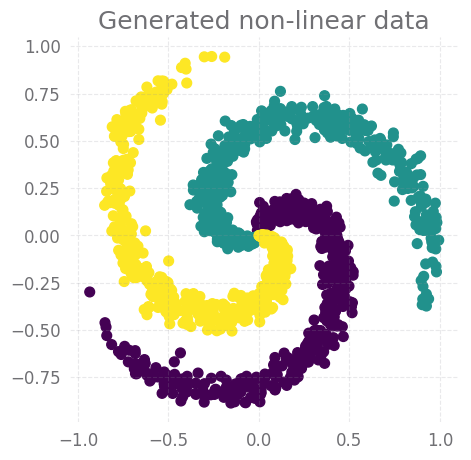

In [0]:
xfig = 5.0
yfig = 5.0

plt.figure(figsize=(xfig, yfig))
plt.title('Generated non-linear data')
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

## One-hot Encoding

Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:

```python
> labels
array([0, 2, 1, 2, 0])
```

**`to_categorical`** converts this into a matrix with as many
columns as there are classes. The number of rows
stays the same.

```python
> to_categorical(labels)
array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]], dtype=float32)
```



---



**to_categorical**

```
tf.keras.utils.to_categorical(y, num_classes=None, dtype='float32')
```
Converts a class vector (integers) to binary class matrix.

**Arguments:**

- **`y`**: class vector to be converted into a matrix (integers from 0 to num_classes).
- **`num_classes`**: total number of classes.
- **`dtype`**: The data type expected by the input, as a string (float32, float64, int32...)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)

print(x_train.shape, y_train.shape)

y_train_c = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_c = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train_c.shape)

(1050, 2) (1050,)
(1050, 3)


# Linear Model

Before we get to our neural network, we're going to implement a linear model (logistic regression). We want to see why linear models won't suffice for our dataset.

In [0]:
def build_linear(n_units, n_features):    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=[n_features]),
        tf.keras.layers.Dense(n_units, activation='softmax')
    ])
    
    opt = tf.keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [0]:
linear_model = build_linear(n_units=3, n_features=2)
linear_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [0]:
r = linear_model.fit(x_train, y_train_c, 
                 validation_split=0.1, 
                 epochs=100, 
                 verbose=1)


history_dict = r.history
history_list = list(history_dict.keys())
print(history_list)

Train on 945 samples, validate on 105 samples
Epoch 1/100
945/945 [==============================] - 0s 227us/sample - loss: 0.9801 - accuracy: 0.4381 - val_loss: 0.9817 - val_accuracy: 0.4381
Epoch 2/100
945/945 [==============================] - 0s 81us/sample - loss: 0.9793 - accuracy: 0.4392 - val_loss: 0.9810 - val_accuracy: 0.4381
Epoch 3/100
945/945 [==============================] - 0s 75us/sample - loss: 0.9785 - accuracy: 0.4402 - val_loss: 0.9803 - val_accuracy: 0.4381
Epoch 4/100
945/945 [==============================] - 0s 76us/sample - loss: 0.9776 - accuracy: 0.4413 - val_loss: 0.9796 - val_accuracy: 0.4381
Epoch 5/100
945/945 [==============================] - 0s 76us/sample - loss: 0.9768 - accuracy: 0.4413 - val_loss: 0.9790 - val_accuracy: 0.4381
Epoch 6/100
945/945 [==============================] - 0s 75us/sample - loss: 0.9760 - accuracy: 0.4423 - val_loss: 0.9783 - val_accuracy: 0.4381
Epoch 7/100
945/945 [==============================] - 0s 91us/sample - loss:

In [0]:
evaluation = linear_model.evaluate(x_test, y_test_c, verbose=0)
print(evaluation)

[0.9198821216159396, 0.5311111]


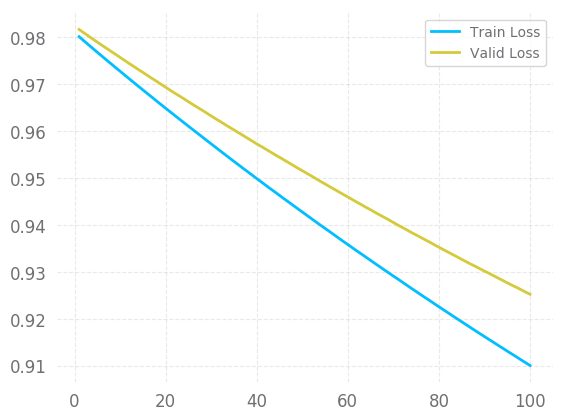

In [0]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Valid Loss')
plt.legend()
plt.show()

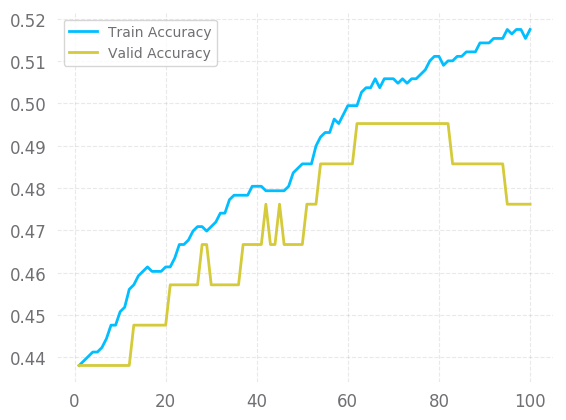

In [0]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Valid Accuracy')
plt.legend()
plt.show()

In [0]:
#@title ## Multiclass decision boundary

def plot_mc_decision_boundary(model, x, y, steps=1000):
    """ Plot multiclass decision boundary,
    
    Args:
        model (keras.Model): a keras model.
        x (ndarray): a numpy array.
        y (ndarray): a numpy array.
        steps (integer): number of linear spaces.
    
    Returns:
        None
    """
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    
    x_span = np.linspace(x_min, x_max, steps)
    y_span = np.linspace(y_min, y_max, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    
    y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = y_pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, alpha=0.5)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    return None

In [0]:
#@title ## Visualize the decision boundary

In [0]:
#@title ## Plot confusion matrix

def plot_confusion_matrix(cm, classes):
    """ Plot confusion matrix
    
    Args:
        cm (ndarray): the input of confusion matrix.
        classes (integer): number of classes.
        
    Returns:
        None
    """
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    return None

## Classification Report

`sklearn.metrics.classification_report`

Build a text report showing the main classification metrics

**Params:**
- `y_true` : 1d array-like, or label indicator array / sparse matrix
- `y_pred` : 1d array-like, or label indicator array / sparse matrix


**Output:**
```bash
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3
```

In [0]:
#@title ## Confusion matrix

# Non-linear Model

Now let's see how the MLP performs on the data. Note that the only difference is the addition of the non-linear activation function (we use $ReLU$ which is just $max(0, z))$. 

In [0]:
#@title ## Build non-linear model [MLP Model](https://en.wikipedia.org/wiki/Multilayer_perceptron)

def build_non_linear(n_classes, n_units, n_features):
    model = None
    
    return model

In [0]:
#@title ## Create non-linear model

In [0]:
#@title ## Fit non-linear model.

In [0]:
#@title ## Evaluating

In [0]:
#@title ## Plotting

In [0]:
#@title ## Visualize the decision boundary

In [0]:
#@title ## Confusion matrix

# Overfitting

Though neural networks are great at capturing non-linear relationships they are highly susceptible to overfitting to the training data and failing to generalize on test data. Just take a look at the example below where we generate completely random data and are able to fit a model with [$2*N*C + D$](https://arxiv.org/abs/1611.03530) hidden units. The training performance is great but the overfitting leads to very poor test performance. We'll be covering strategies to tackle overfitting in future lessons.

Let me define overfitting more formally. Overfitting refers to a model that models the “training data” too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

# How do you know your NN is overfitting?
In practice, detecting that our model is overfitting is difficult. It’s not uncommon that our trained model is already in production and then we start to realize that something is wrong. In fact, it is only by confronting new data that you can make sure that everything is working properly. However, during the training we should try to reproduce the real conditions as much as possible. For this reason, it is good practice to divide our dataset into three parts - training set, dev set (also known as cross-validation or hold-out) and test set. Our model learns by seeing only the first of these parts. Hold-out is used to track our progress and draw conclusions to optimise the model. While, we use a test set at the end of the training process to evaluate the performance of our model. Using completely new data allows us to get an unbiased opinion on how well our algorithm works.

It is very important to make sure that your cross-validation and test set come from the same distribution as well as that they accurately reflect data that we expect to receive in the future. Only then we can be sure that the decisions we make during the learning process bring us closer to a better solution. I know what you are thinking about… “How should I divide my dataset?” Until recently, one of the most frequently recommended splits was 60/20/20, but in the era of big data, when our dataset can count millions of entries, those fixed proportions are no longer appropriate. In short, everything depends on the size of the dataset we work with. If we have millions of entries at our disposal, perhaps it would be better idea to divide them in 98/1/1 ratio. Our dev and test sets should be simply large enough to give us high confidence in the performance of our model. 

<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563669330/workshops/dl_tf2_2019_07_21/1_AmR4i-5ODVGg6eNms1dtiA_wjbyfq.png" width=450>
</p>

# Bias and Variance
To give us a better understanding of this some how complex issue, we will use a simple example, that hopefully allow us to develop a valuable intuition. Our dataset consisting of two classes of points, located in a two-dimensional space.

<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563669902/workshops/dl_tf2_2019_07_21/1_uoDKRGY0OzNSO0rV-R5uAw_sv7dwg.png" width=450>
</p>

The first model in the top right corner is very simple and therefore has a high bias, i.e. it is not able to find all significant links between features and result. This is understandable - our dataset has a lot of noise in it, and therefore simple linear regression, is not able to deal with it effectively. Neural networks performed much better, but the first one (shown in the lower left corner) fitted into the data too closely, which made it work significantly worse on the hold-out set. This means that it has a high variance - it fits into the noise and not into the intended output. This undesirable effect was mitigated, in the last model, by the use of regularisation.

<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563670257/workshops/dl_tf2_2019_07_21/1_qHqft4c0A7Kg1TPqpVpPDg_tsturf.gif" width=450>
</p>

# Ways to prevent overfitting

### L1 and L2 Regularizations

One of the first methods we should try when we need to reduce overfitting is regularisation. It involves adding an extra element to the loss function, which punishes our model for being too complex or, in simple words, for using too high values in the weight matrix. This way we try to limit its flexibility, but also encourage it to build solutions based on multiple features. Two popular versions of this method are L1 - Least Absolute Deviations (LAD) and L2 - Least Square Errors (LS). Equations describing these regularisations are given below.
In most cases the use of L1 is preferable, because it reduces the weight values of less important features to zero, very often eliminating them completely from the calculations. In a way, it is a built-in mechanism for automatic featur selection. Moreover, L2 does not perform very well on datasets with a large number of outliers. The use of value squares results in the model minimizing the impact of outliers at the expense of more popular examples.

<p align="center">
$$
\begin{array}{rlrl}{J_{L 1}(W, b)} & {=\frac{1}{m} \sum_{i=1}^{m} L\left(\hat{y}^{(i)}, y^{(i)}\right)+\lambda\|w\|_{1}} & {\|w\|_{1}} & {=\sum_{j=1}^{n_{x}}\left|w_{j}\right|} \\ {J_{L 2}(W, b)} & {=\frac{1}{m} \sum_{i=1}^{m} L\left(\hat{y}^{(i)}, y^{(i)}\right)+\lambda\|w\|_{2}} & {\|w\|_{2}} & {=\sum_{j=1}^{n_{x}} w_{j}^{2}}\end{array}
$$
</p>

Increasing the λ value also increases the regularisation effect. Models with a very low λ coefficient value are very “turbulent”.

# Dropout
Another very popular method of regularization of neural networks is dropout. This idea is actually very simple - every unit of our neural network (except those belonging to the output layer) is given the probability p of being temporarily ignored in calculations. Hyper parameter p is called dropout rate and very often its default value is set to 0.5. Then, in each iteration, we randomly select the neurons that we drop according to the assigned probability. As a result, each time we work with a smaller neural network. The visualization below shows an example of a neural network subjected to a dropout. We can see how in each iteration random neurons from second and fourth layer are deactivated.

<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563671042/workshops/dl_tf2_2019_07_21/1_064lT1SXq_6F7uoc00V1fw_pcrcys.gif" width=450>
</p>

# Early Stopping
The graph below shows the change in accuracy values calculated on the test and cross-validation sets during subsequent iterations of learning process. We see right away that the model we get at the end is not the best we could have possibly create. To be honest, it is much worse than what we have had after 150 epochs. Why not interrupt the learning process before the model starts overfitting? This observation inspired one of the popular overfitting reduction method, namely early stopping.
<p align="center">
<img src="https://res.cloudinary.com/dltf2/image/upload/v1563671264/workshops/dl_tf2_2019_07_21/1_iANsamYbzkuUwIBWDP21GQ_wd0lzg.gif" width=450>
</p>

In [0]:
#@title ## Generate random x, y

ov_num_samples = 40 #@param {type:"integer"}
ov_dimensions = 2 #@param {type:"integer"}
ov_num_classes = 3 #@param {type:"integer"}

ov_x = np.random.randn(ov_num_samples * ov_num_classes, ov_dimensions)
ov_y = np.array([[i] * ov_num_samples for i in range(ov_num_classes)])
ov_y = ov_y.flatten()


print()
print('x: %s' % str(ov_x.shape))
print('y: %s' % str(ov_y.shape))


x: (120, 2)
y: (120,)


In [0]:
#@title ## Preprocessing

In [0]:
#@title ## Create non-linear model

In [0]:
#@title ## Fit overfie model.

In [0]:
#@title ## Evaluating

In [0]:
#@title ## Plotting

In [0]:
#@title ## Visualize the decision boundary

In [0]:
#@title ## Confusion matrix

# Regularization

In [0]:
#@title ## Build non-linear model [MLP Model](https://en.wikipedia.org/wiki/Multilayer_perceptron)

def build_non_linear_with_regularization(n_classes, n_units, n_features):
    model = None
    
    return model

In [0]:
#@title ## Create non-linear model

In [0]:
#@title ## Fit non-linear model with regularization.

In [0]:
#@title ## Evaluating

In [0]:
#@title ## Plotting

In [0]:
#@title ## Visualize the decision boundary

In [0]:
#@title ## Confusion matrix

# Dropout

A great technique to overcome overfitting is to increase the size of your data but this isn't always an option. Fortuntely, there are methods like regularization and dropout that can help create a more robust model. We've already seen regularization and we can easily add it in our optimizer to use it in PyTorch. 

Dropout is a technique (used only during training) that allows us to zero the outputs of neurons. We do this for p% of the total neurons in each layer and it changes every batch. Dropout prevents units from co-adapting too much to the data and acts as a sampling strategy since we drop a different set of neurons each time.

<img src="https://res.cloudinary.com/dltf2/image/upload/v1563525054/workshops/dl_tf2_2019_07_21/dropout_wnnfju.png" width=400>

In [0]:
#@title ## Build non-linear model [MLP Model](https://en.wikipedia.org/wiki/Multilayer_perceptron)

def build_non_linear_with_dropout(n_classes, n_units, n_features):
    model = None
    
    return model

In [0]:
#@title ## Create non-linear model

In [0]:
#@title ## Fit non-linear model with dropout.

In [0]:
#@title ## Evaluating

In [0]:
#@title ## Plotting

In [0]:
#@title ## Visualize the decision boundary

In [0]:
#@title ## Confusion matrix

# Visualization

In [0]:
#@title ## Build non-linear model [MLP Model](https://en.wikipedia.org/wiki/Multilayer_perceptron)

def build_non_linear_v2(n_classes, n_units, n_features):
    model = None
    
    return model

In [0]:
#@title ## Create non-linear model

In [0]:
#@title # Summary of the model

In [0]:
#@title ## Model Arch

In [0]:
#@title ## Tensorboard callbacks

In [0]:
#@title ## Fit non-linear model.

In [0]:
#@title ## Plotting

In [0]:
#@title ## Visualize the decision boundary

In [0]:
#@title ## Confusion matrix

# Tensorboard

In [0]:
# %load_ext tensorboard

In [0]:
# %tensorboard --logdir logs/scalars